In [1]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from twitter_scraper import settings
from twitter_scraper.text.tweets import get_stemmed_text
from twitter_scraper.text.tweets import clean_twitter_text
from twitter_scraper.clean.users import USER_DTYPE
from twitter_scraper.clean.tweets import TWEET_DTYPE


users_df = pd.read_csv(settings.USERS_CSV, dtype=USER_DTYPE)
tweets_df = pd.read_csv(settings.TWEETS_CSV, dtype=TWEET_DTYPE)
retweets_df = pd.read_csv(os.path.join(settings.OUTPUT_DIR, 'text', 'edges-retweets-3K.csv'))
# retweets_df = retweets_df.loc[retweets_df['source'] != retweets_df['target']]

user_idx = users_df[['user_id', 'screen_name']].set_index('user_id').to_dict()['screen_name']
retweets_df['source'] = retweets_df['source'].transform(lambda x: user_idx[x])
retweets_df['target'] = retweets_df['target'].transform(lambda x: user_idx[x])
# retweets_df['full_text'] = retweets_df['full_text'].transform(clean_twitter_text)
# retweets_df['langid'] = retweets_df['full_text'].transform(detect_language)

[WARNING] 2022-11-01 12:08:03 discord.client - PyNaCl is not installed, voice will NOT be supported


In [2]:
retweets_df

,rt_tweet_id,og_tweet_id,target,source,rt_created_at,full_text,langid,og_created_at,og_full_text,og_langid,full_text_transform,stemmed,source-target
0,1574086756311384064,1574009257531424768,krysteburn,radicbozo81,2022-09-25 17:21:42+00:00,RT @radicbozo81: Najveći prosvjed liječnika u ...,hr,NaN,NaN,NaN,"['najveći', 'prosvjed', 'liječnika', 'zdravstv...","['velik', 'prosvjed', 'liječnik', 'zdravstvo',...",1216786941594755072-3297556244
1,1559562964029640704,1559457653658640384,kozaroza_,MatoMijakic,2022-08-16 15:29:20+00:00,RT @MatoMijakic: @jebigasad_ Majko mila pa teb...,hr,NaN,NaN,NaN,"['majko', 'mila', 'nahraniti', 'hitno', 'šalje...","['majka', 'milo', 'nahraniti', 'hitno', 'slati...",1233135039187226624-927587695
2,1556252333645914114,1555257894966362112,IvanCar47530225,VladaRH,2022-08-07 12:14:04+00:00,RT @VladaRH: PVRH @AndrejPlenkovic: Sutra je D...,hr,2022-08-04 18:22:32+00:00,"PVRH @AndrejPlenkovic: Sutra je Dan pobjede, D...",hr,"['pvrh', 'dan', 'pobjede', 'dan', 'domovinske'...","['pvrh', 'dan', 'pobjeda', 'dan', 'domovinski'...",444097675-1086052453840244737
3,1520128090596421632,1520123161714609920,SFeraZG,sferakon,2022-04-29 19:49:14+00:00,RT @sferakon: Najbolja novela:\nMihaela Marija...,hr,NaN,NaN,NaN,"['najbolja', 'novela', 'mihaela', 'marija', 'p...","['dobar', 'novela', 'mihael', 'marija', 'Perko...",29849547-1422571771962740743
4,1568327037017853956,1568234716817461248,ITAZagreb,ItalyinCroatia,2022-09-09 19:54:38+00:00,RT @ItalyinCroatia: *New data just released* A...,en,NaN,NaN,NaN,"['new', 'data', 'released', 'decade', 'italy',...","['new', 'datum', 'release', 'decade', 'italy',...",3017226379-786600850588184576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,1561446754343702529,1561408447790341888,maljciki,radicbozo81,2022-08-21 20:14:51+00:00,"RT @radicbozo81: U tjednu iza nas, RH po smrtn...",hr,NaN,NaN,NaN,"['tjednu', 'rh', 'smrtnosti', 'milijun', 'stan...","['tjedan', 'RH', 'smrtnost', 'milijun', 'stano...",1216786941594755072-18883474
2256,1575946653554855936,1575936540618161920,gorkakava,mdfnlshts,2022-09-30 20:32:16+00:00,RT @mdfnlshts: https://t.co/xsUHzPZOzm,zxx,NaN,NaN,NaN,[],[],20530141-314006985
2257,1544302741782134786,1544294138362871808,NBrnjac,VladaRH,2022-07-05 12:50:40+00:00,RT @VladaRH: PVRH @AndrejPlenkovic sa županima...,hr,2022-07-05 12:16:28+00:00,"PVRH @AndrejPlenkovic sa županima, predstavnic...",hr,"['pvrh', 'županima', 'predstavnicima', 'udruge...","['pvrh', 'župan', 'predstavnik', 'udruga', 'gr...",444097675-1219183908077686784
2258,1526522756694687744,1526506795014967296,kreativni,PEEKANDPOKE,2022-05-17 11:19:21+00:00,RT @PEEKANDPOKE: Ljubljanski dizajnerski studi...,bs,2022-05-17 10:15:55+00:00,"Ljubljanski dizajnerski studio ""JUS"" ustupio n...",hr,"['ljubljanski', 'dizajnerski', 'studio', 'jus'...","['ljubljanski', 'dizajnerski', 'studio', 'Jus'...",34976713-59474596


In [136]:
# retweet_tweet_ids = retweets_df.og_tweet_id.value_counts().index
retweets_df.og_tweet_id.value_counts()

1477307409945214720    7
1485159946958385152    4
1526468312099586048    4
1497930820530712320    4
1484872276843667456    3
                      ..
1531940418132262912    1
1508710276627062784    1
1523574096105066496    1
1508797949740003328    1
1541169923384303616    1
Name: og_tweet_id, Length: 2142, dtype: int64

<AxesSubplot:>

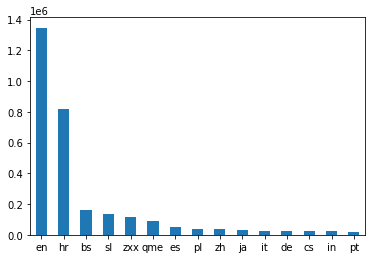

In [137]:
tweets_df.langid.value_counts()[:15].plot.bar(rot=0)

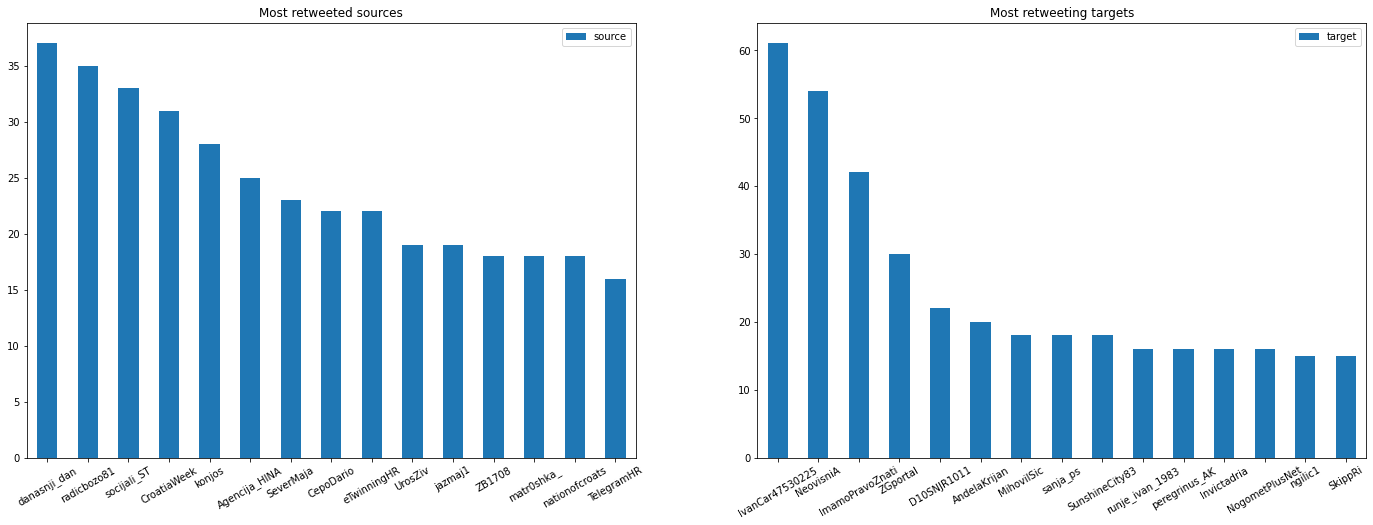

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

source_retweets_df = pd.DataFrame(retweets_df.source.value_counts()).join(users_df[users_df['verified'] == False][['screen_name']].set_index('screen_name'), how='inner').sort_values('source', ascending=False)[:15]
source_retweets_df.plot.bar(rot=30, title='Most retweeted sources', ax=axs[0])

target_retweets_df = pd.DataFrame(retweets_df.target.value_counts()).join(users_df[users_df['verified'] == False][['screen_name']].set_index('screen_name'), how='inner').sort_values('target', ascending=False)[:15]
target_retweets_df.plot.bar(rot=30, title='Most retweeting targets', ax=axs[1])
plt.show()

In [63]:
users_df[users_df['screen_name'] == 'DNEVNIKhr']
users_df[users_df['screen_name'] == 'VladaRH']
users_df[users_df['screen_name'] == 'drago99294906']
# users_df[users_df['screen_name'] == 'CroatiaWeek']

,user_id,user_id_str,name,screen_name,location,description,protected,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,is_croatian,clean_location
14975,1022798673745510400,1022798673745510400,ŠiMe,drago99294906,Zagreb,"Ego sum, qui sum. - Ja sam koji jesam",False,False,67,93,0,9287,8998,2018-07-27 10:59:41+00:00,True,Zagreb


In [132]:
retweets_df[retweets_df['source'] == 'socijali_ST'].target.value_counts()
df = retweets_df[['source', 'target']].groupby(['source', 'target']).agg(count=('source', 'size')).reset_index()
suma_df = df.groupby('source').agg(suma=('count', 'sum')).sort_values('suma')

for source in suma_df.index:
    df.loc[df['source'] == source, 'suma'] = suma_df.loc[source, 'suma']
df = df.loc[df['count'] > df['suma'] * 0.8][['source', 'target']]

df['source-target'] = df['source'] + '-' + df['target']
retweets_df['source-target'] = retweets_df['source'] + '-' + retweets_df['target']
retweets_df[~retweets_df['source-target'].isin(df['source-target'])]

,source,target,rt_tweet_id,full_text,og_tweet_id,rt_time_elapsed_sec,langid,full_text_transform,source-target
0,sdewes_centre,TihomirTomic,1504789813433671682,SPECIAL ISSUES :: What is the role of #energy ...,1481965822100729856,5441663.0,en,"['special', 'issues', 'role', 'energy', 'waste...",sdewes_centre-TihomirTomic
1,HNS_CFF,LukaVeso,1575092693482414080,RT @HNS_CFF: 🇭🇷 #Croatia on 🔝 seems just fine ...,1575027254232764416,NaN,en,"['croatia', 'seems', 'fine', 'nationsleague']",HNS_CFF-LukaVeso
2,gnkdinamo,LukaVeso,1567224091236614149,FT 90'+8 Dinamo - Chelsea 1:0 (Oršić) 🦁😎💙 WIII...,1567221760524795904,556.0,ro,"['ft', 'dinamo', 'chelsea', 'oršić', 'wiiiiiii...",gnkdinamo-LukaVeso
3,HNS_CFF,LukaVeso,1562569249687605249,RT @HNS_CFF: Čestitamo! @gnkdinamo branit će h...,1562569135804264448,NaN,hr,"['čestitamo', 'branit', 'hrvatske', 'boje', 'g...",HNS_CFF-LukaVeso
4,natasazecevic,susacp11,1526577980746649610,RT @natasazecevic: Rastavio ga https://t.co/UE...,1526468312099586048,NaN,mg,['rastavio'],natasazecevic-susacp11
...,...,...,...,...,...,...,...,...,...
49176,JuricNovaTV,DNEVNIKhr,1582814878321893376,#DnevnikNoveTV doznaje kad počinje suđenje spl...,1582810651277205504,1007.0,hr,"['dnevniknovetv', 'doznaje', 'kad', 'počinje',...",JuricNovaTV-DNEVNIKhr
49177,KastelanIvan,DNEVNIKhr,1582714360295837701,RT @KastelanIvan: Predsjednik Milanović održav...,1582712648709599232,NaN,hr,"['predsjednik', 'milanović', 'održava', 'preda...",KastelanIvan-DNEVNIKhr
49178,novahr,DNEVNIKhr,1582706277729173505,@PROVJERENO donosi svjedočanstva bivših članov...,1582704818950324224,348.0,hr,"['donosi', 'svjedočanstva', 'bivših', 'članova...",novahr-DNEVNIKhr
49179,hkresic,DNEVNIKhr,1582702191709601793,RT @hkresic: Ministar Primorac na sjednici @Vl...,1582702002706219008,NaN,hr,"['ministar', 'primorac', 'sjednici', 'kaže', '...",hkresic-DNEVNIKhr


In [131]:
df

,source,target,count,suma,source-target
0,09Nenad,1ookica,1,21.0,09Nenad-1ookica
1,09Nenad,Anunnaki128Owl,1,21.0,09Nenad-Anunnaki128Owl
2,09Nenad,FranKuseta,1,21.0,09Nenad-FranKuseta
3,09Nenad,KlaicBoris,1,21.0,09Nenad-KlaicBoris
4,09Nenad,KsenijaMarinko4,1,21.0,09Nenad-KsenijaMarinko4
...,...,...,...,...,...
16440,zrinjkaperusko,AndelaKrijan,1,3.0,zrinjkaperusko-AndelaKrijan
16441,zrinjkaperusko,gvozdenflego,2,3.0,zrinjkaperusko-gvozdenflego
16442,zvonimirn,SDPOgulin,1,1.0,zvonimirn-SDPOgulin
16443,zzavrski,its_tomislav,5,6.0,zzavrski-its_tomislav


In [ ]:
retweets_df.loc[retweets_df['source'].isin(source_retweets_df.index) | retweets_df['target'].isin(target_retweets_df.index)]

/home/milky/Envs/twitter_scraper/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:717: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  edge_collection = mpl.collections.LineCollection(


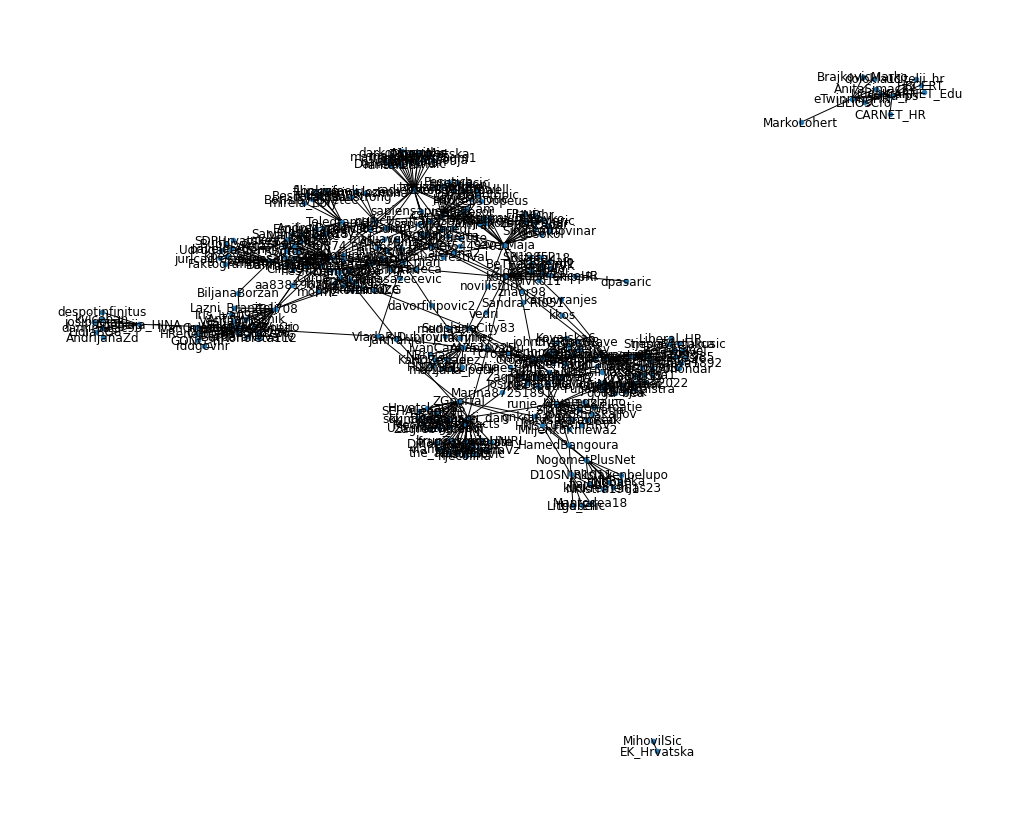

In [5]:
fig, ax = plt.subplots(figsize=(18, 15))


G = nx.from_pandas_edgelist(retweets_df.loc[retweets_df['source'].isin(source_retweets_df.index) | retweets_df['target'].isin(target_retweets_df.index)])
nx.draw_spring(G, node_size=20, ax=ax, with_labels=True, overlap=False)

In [6]:
G = nx.from_pandas_edgelist(retweets_df, create_using=nx.DiGraph)
dg_centrality = nx.degree_centrality(G)
dg_centrality = [{'screen_name': key, 'centrality': value} for key, value in dg_centrality.items()]
sorted_dg_centrailty = sorted(dg_centrality, key=lambda x: x['centrality'], reverse=True)
best_dg_centrality = sorted_dg_centrailty[:10]
best_dg_centrality

[{'screen_name': 'HNS_CFF', 'centrality': 0.03980099502487562},
 {'screen_name': 'CepoDario', 'centrality': 0.031840796019900496},
 {'screen_name': 'socijali_ST', 'centrality': 0.027860696517412933},
 {'screen_name': 'gnkdinamo', 'centrality': 0.02388059701492537},
 {'screen_name': 'SeverMaja', 'centrality': 0.02388059701492537},
 {'screen_name': 'VladaRH', 'centrality': 0.022885572139303482},
 {'screen_name': 'N1infoZG', 'centrality': 0.022885572139303482},
 {'screen_name': 'EK_Hrvatska', 'centrality': 0.022885572139303482},
 {'screen_name': 'radicbozo81', 'centrality': 0.02189054726368159},
 {'screen_name': 'mrak', 'centrality': 0.02189054726368159}]

In [ ]:
from twitter_scraper.utils import fileio
from twitter_scraper.text.tweets import get_stemmed_text

best_dg_centrality_user_ids = [item['user_id'] for item in best_dg_centrality]

def get_central_user_tweets():
    user_tweet_records = tweets_df[tweets_df['user_id'].isin(best_dg_centrality_user_ids)][['user_id', 'full_text']].to_dict(orient='records')
    central_user_tweets = {}
    for item in user_tweet_records:
        user_id = item['user_id']
        if user_id in central_user_tweets:
            central_user_tweets[user_id].append(item['full_text'])
        else:
            central_user_tweets[user_id] = [item['full_text']]
    return central_user_tweets


central_user_tweets = get_central_user_tweets()
most_occuring_keywords = {}
for user_id in best_dg_centrality_user_ids:
    word_count = most_occuring_keywords.get(user_idx[user_id], {})
    for text in central_user_tweets[user_id]:
        text = get_stemmed_text(text)
        for word in text:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1
    most_occuring_keywords[user_idx[user_id]] = word_count
# fileio.write_content('most_occuring_keywords.json', most_occuring_keywords, 'json')
print(most_occuring_keywords[user_idx[user_id]])

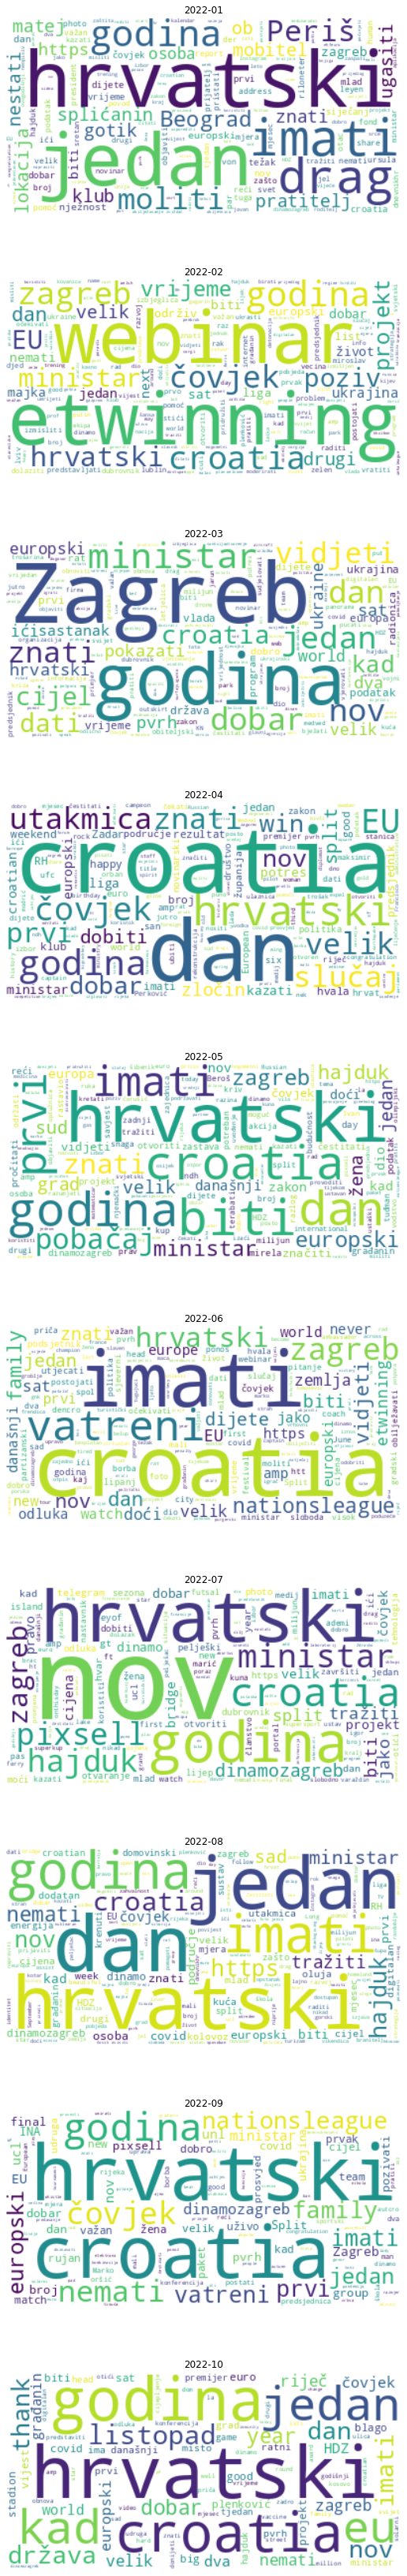

In [30]:
from wordcloud import WordCloud

retweets_df['created_at'] = pd.to_datetime(retweets_df['rt_created_at'])
retweets_df['week'] = retweets_df['created_at'].dt.strftime('%Y-%W')
retweets_df['month'] = retweets_df['created_at'].dt.strftime('%Y-%m')
# retweets_df['stemmed'] = retweets_df['stemmed'].map(eval)
gdf = retweets_df[['month', 'stemmed']].groupby('month').sum()


fig, axs = plt.subplots(len(gdf.index), figsize=(9, len(gdf.index)*6))
for i, month in enumerate(gdf.index):
    string = " ".join(list(filter(None, gdf.loc[month, 'stemmed'])))
    wordcloud = WordCloud(collocations=False, background_color='white').generate(string)
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(month)
    axs[i].axis('off')
plt.show()